- Loads the `cleaned_crime_data.csv` file for analysis.
- Identifies the top 10 most common criminal offenses within the dataset.
- Visualise data

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time  
import plotly.express as px





In [2]:
# load the cleaned_crime_data.csv
file_path = "../Resources/cleaned_crime_data.csv"
df = pd.read_csv(file_path)
df.head()

,ds,ofns_desc,boro_nm,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex
0,2010-01-01 00:00:00,RAPE,BROOKLYN,25-44,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
1,2010-01-01 00:00:00,SEX CRIMES,BROOKLYN,18-24,UNKNOWN,F,<18,UNKNOWN,F
2,2010-01-01 00:00:00,OFF. AGNST PUB ORD SENSBLTY &,BRONX,25-44,WHITE HISPANIC,F,18-24,WHITE HISPANIC,F
3,2010-01-01 00:00:00,SEX CRIMES,BRONX,UNKNOWN,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
4,2010-01-01 00:00:00,CRIMINAL MISCHIEF & RELATED OF,BROOKLYN,(null),(null),(null),(null),UNKNOWN,D


In [ ]:
df.info()

In [4]:
most_comon_crimes_df = df.copy()

In [5]:
# Identifies the top 10 most common criminal offenses within the dataset.
common_offenses = most_comon_crimes_df["ofns_desc"].value_counts().head(10)
common_offenses



ofns_desc
PETIT LARCENY                     1120973
HARRASSMENT 2                      848787
ASSAULT 3 & RELATED OFFENSES       673483
CRIMINAL MISCHIEF & RELATED OF     616129
GRAND LARCENY                      555028
DANGEROUS DRUGS                    291714
OFF. AGNST PUB ORD SENSBLTY &      288325
FELONY ASSAULT                     268562
ROBBERY                            212569
BURGLARY                           198312
Name: count, dtype: int64

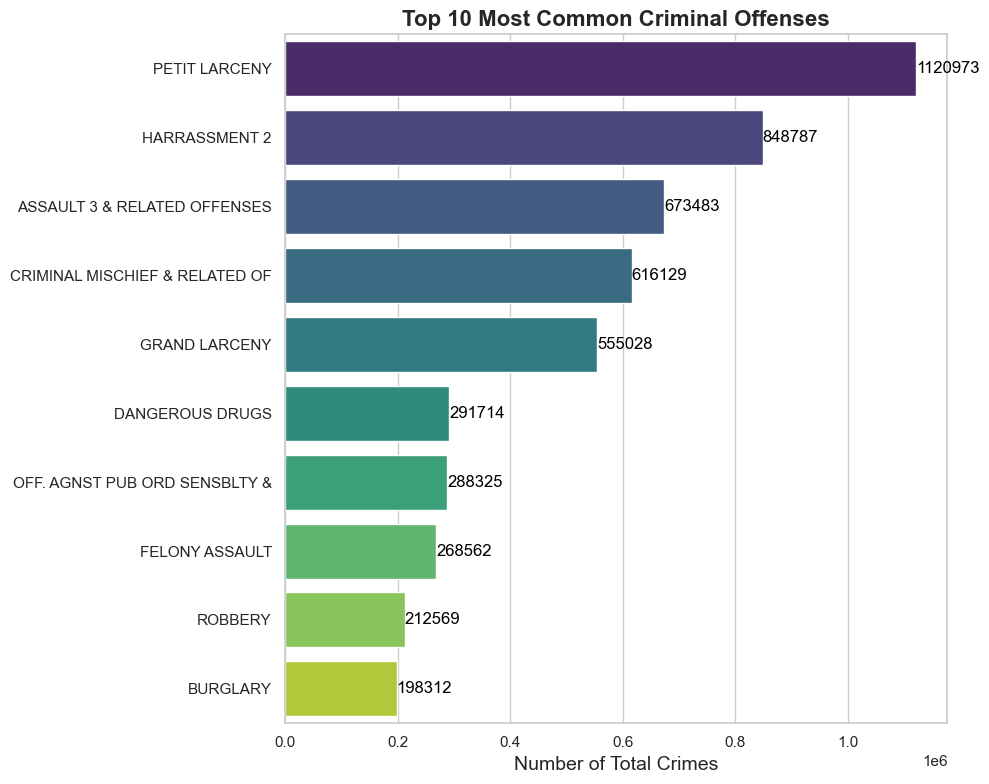

In [6]:
# Postavljanje Seaborn stila
sns.set(style="whitegrid")

# Konvertovanje Series objekta u DataFrame za lakše plotovanje
common_offenses_df = common_offenses.reset_index()
common_offenses_df.columns = ['Type of Offense', 'Number of Total Crimes']

# Sortiranje za bolju vizualizaciju
common_offenses_df.sort_values(by='Number of Total Crimes', ascending=False, inplace=True)

# Kreiranje grafikona
plt.figure(figsize=(10, 8))
sns.barplot(x='Number of Total Crimes', y='Type of Offense', data=common_offenses_df, palette='viridis')

# Dodavanje naslova i oznaka osa sa stilizovanjem
plt.title("Top 10 Most Common Criminal Offenses", fontsize=16, fontweight='bold')
plt.xlabel("Number of Total Crimes", fontsize=14)
plt.ylabel("")  # Uklanjamo labelu za y-osu jer je jasno iz konteksta

# Dodavanje vrednosti na stubove
for index, value in enumerate(common_offenses_df['Number of Total Crimes']):
    plt.text(value, index, str(value), color='black', va='center')

plt.tight_layout()  # Poboljšava raspored elemenata na grafikonu
plt.show()


In [ ]:
# save the top 10 most common criminal offenses to a png file in Output folder
output_file_path = "../Output/top_10_most_common_offenses.png"


### Trends over the years

In [7]:
trends_over_yrs_df = df.copy()

In [12]:
trends_over_yrs_df.head()

,ds,ofns_desc,boro_nm,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex
0,2010-01-01 00:00:00,RAPE,BROOKLYN,25-44,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
1,2010-01-01 00:00:00,SEX CRIMES,BROOKLYN,18-24,UNKNOWN,F,<18,UNKNOWN,F
2,2010-01-01 00:00:00,OFF. AGNST PUB ORD SENSBLTY &,BRONX,25-44,WHITE HISPANIC,F,18-24,WHITE HISPANIC,F
3,2010-01-01 00:00:00,SEX CRIMES,BRONX,UNKNOWN,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
4,2010-01-01 00:00:00,CRIMINAL MISCHIEF & RELATED OF,BROOKLYN,(null),(null),(null),(null),UNKNOWN,D


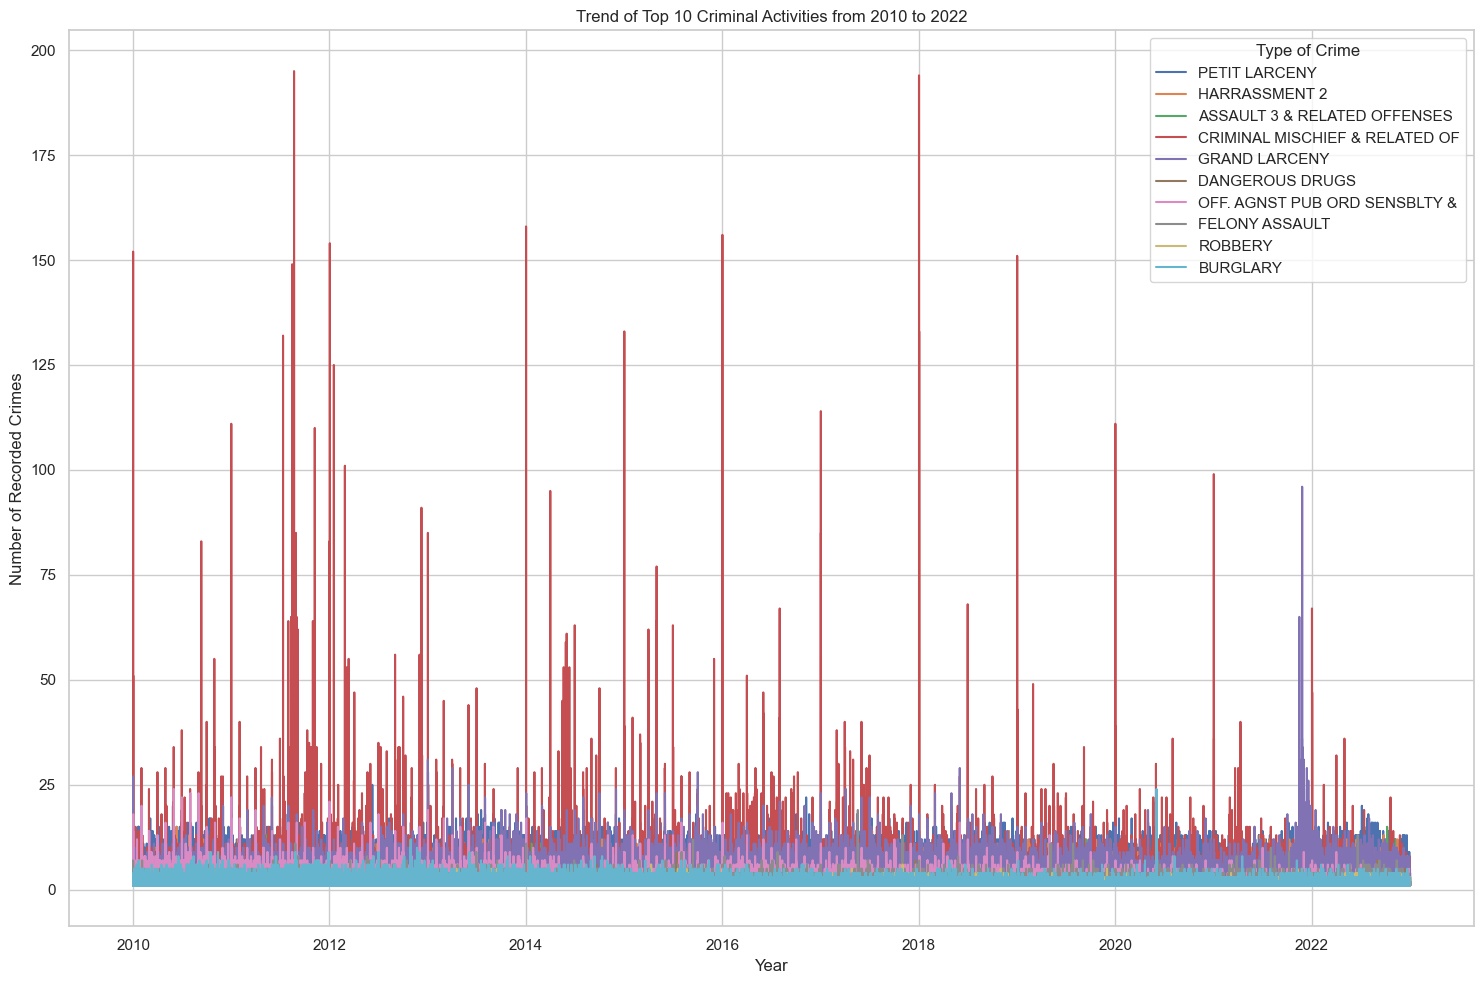

In [13]:
# Convert 'ds' to datetime format
trends_over_yrs_df['ds'] = pd.to_datetime(trends_over_yrs_df['ds'])

# Identification of the top 10 types of crime
top_10_offenses = trends_over_yrs_df['ofns_desc'].value_counts().head(10).index

# Filter the DataFrame for the top 10 types of crime
top_10_df = trends_over_yrs_df[trends_over_yrs_df['ofns_desc'].isin(top_10_offenses)]

# Grouping by date and type of crime and calculating the number of cases
trends_over_time = top_10_df.groupby(['ds', 'ofns_desc']).size().reset_index(name='counts')

# Plot creation for each of the top 10 types of crime
plt.figure(figsize=(15, 10))
for offense in top_10_offenses:
    subset = trends_over_time[trends_over_time['ofns_desc'] == offense]
    plt.plot(subset['ds'], subset['counts'], label=offense)

plt.title('Trend of Top 10 Criminal Activities from 2010 to 2022')
plt.xlabel('Year')
plt.ylabel('Number of Recorded Crimes')
plt.legend(title='Type of Crime')
plt.tight_layout()
plt.show()


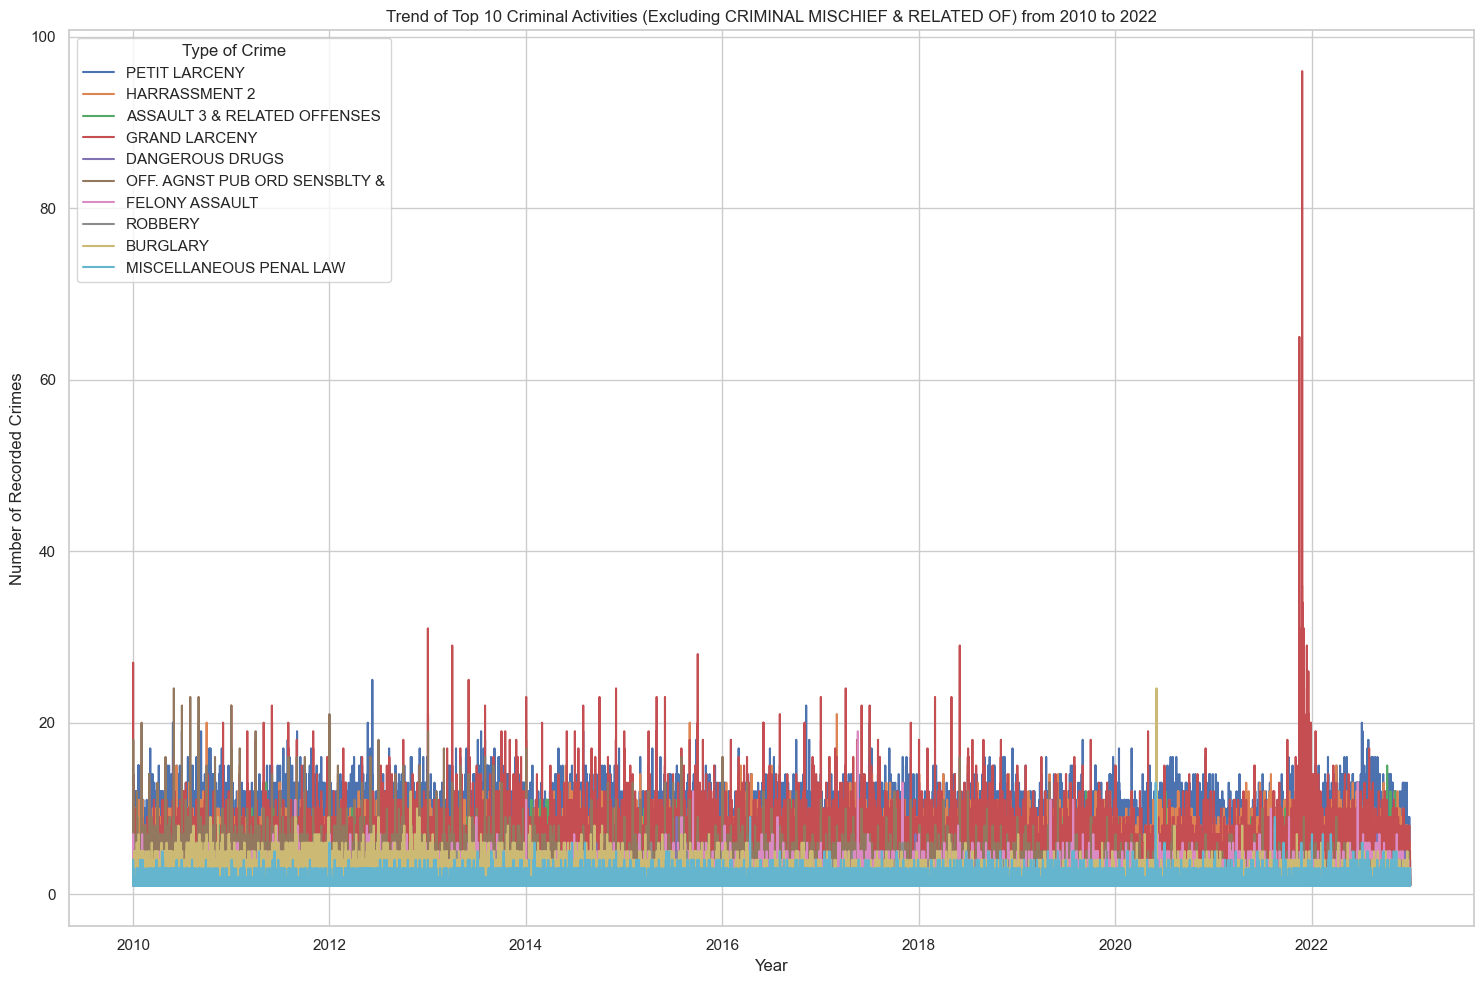

In [16]:
# Identifikacija top 10 vrsta kriminala, isključujući 'CRIMINAL MISCHIEF & RELATED OF'
top_10_offenses = trends_over_yrs_df['ofns_desc'].value_counts().drop('CRIMINAL MISCHIEF & RELATED OF').head(10).index

# Filtriranje DataFrame-a za top 10 vrsta kriminala
top_10_df = trends_over_yrs_df[trends_over_yrs_df['ofns_desc'].isin(top_10_offenses)]

# Grupisanje po datumu i vrsti kriminala i izračunavanje broja slučajeva
trends_over_time = top_10_df.groupby(['ds', 'ofns_desc']).size().reset_index(name='counts')

# Kreiranje plot-a za svaku od top 10 vrsta kriminala
plt.figure(figsize=(15, 10))
for offense in top_10_offenses:
    subset = trends_over_time[trends_over_time['ofns_desc'] == offense]
    plt.plot(subset['ds'], subset['counts'], label=offense)

plt.title('Trend of Top 10 Criminal Activities (Excluding CRIMINAL MISCHIEF & RELATED OF) from 2010 to 2022')
plt.xlabel('Year')
plt.ylabel('Number of Recorded Crimes')
plt.legend(title='Type of Crime')
plt.tight_layout()
plt.show()


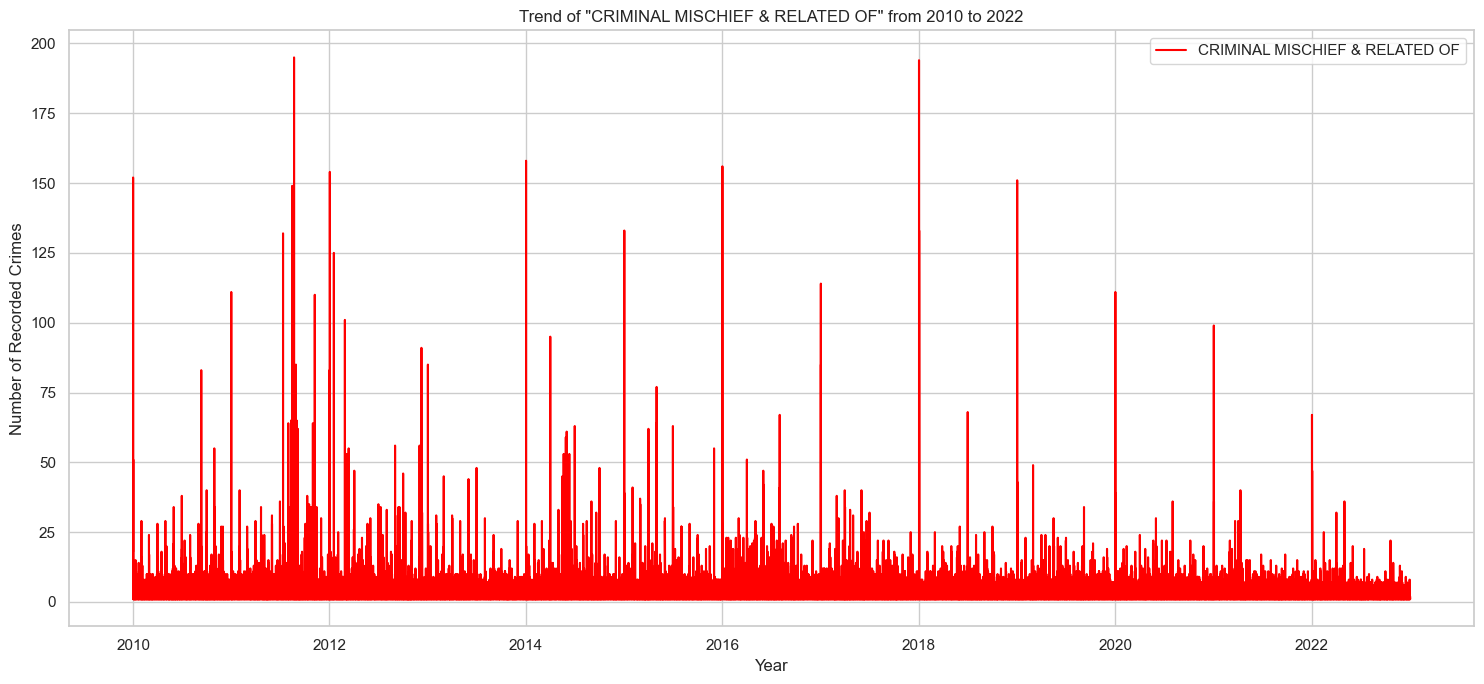

In [17]:
# Filtering DataFrame only for 'CRIMINAL MISCHIEF & RELATED OF'
cm_related_df = trends_over_yrs_df[trends_over_yrs_df['ofns_desc'] == "CRIMINAL MISCHIEF & RELATED OF"]

# Grouping by date and calculating the number of cases
cm_trends_over_time = cm_related_df.groupby('ds').size().reset_index(name='counts')

# Creating a plot for 'CRIMINAL MISCHIEF & RELATED OF'
plt.figure(figsize=(15, 7))
plt.plot(cm_trends_over_time['ds'], cm_trends_over_time['counts'], label='CRIMINAL MISCHIEF & RELATED OF', color='red')

plt.title('Trend of "CRIMINAL MISCHIEF & RELATED OF" from 2010 to 2022')
plt.xlabel('Year')
plt.ylabel('Number of Recorded Crimes')
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
cm_trends_over_time.head()

,ds,counts
0,2010-01-01 00:00:00,3
1,2010-01-01 00:01:00,5
2,2010-01-01 00:05:00,1
3,2010-01-01 00:30:00,2
4,2010-01-01 00:46:00,1


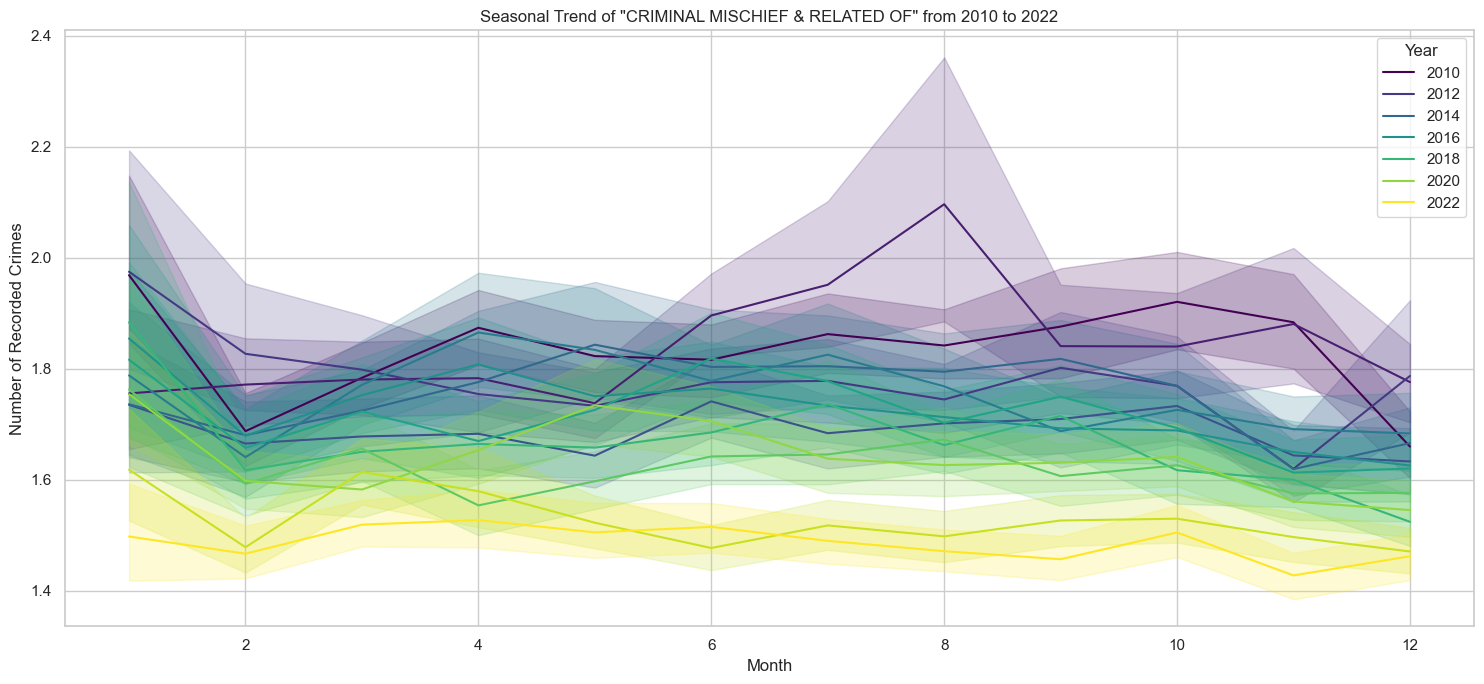

In [23]:
# show sesonal trends for cm_trends_over_time
cm_trends_over_time['ds'] = pd.to_datetime(cm_trends_over_time['ds'])
cm_trends_over_time['year'] = cm_trends_over_time['ds'].dt.year
cm_trends_over_time['month'] = cm_trends_over_time['ds'].dt.month

# Kreiranje plot-a za sezonske trendove
plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='counts', hue='year', data=cm_trends_over_time, palette='viridis')

plt.title('Seasonal Trend of "CRIMINAL MISCHIEF & RELATED OF" from 2010 to 2022')
plt.xlabel('Month')
plt.ylabel('Number of Recorded Crimes')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


C:\Users\abeli\AppData\Local\Temp\ipykernel_7608\1902413561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cm_related_df['ds'] = pd.to_datetime(cm_related_df['ds'])


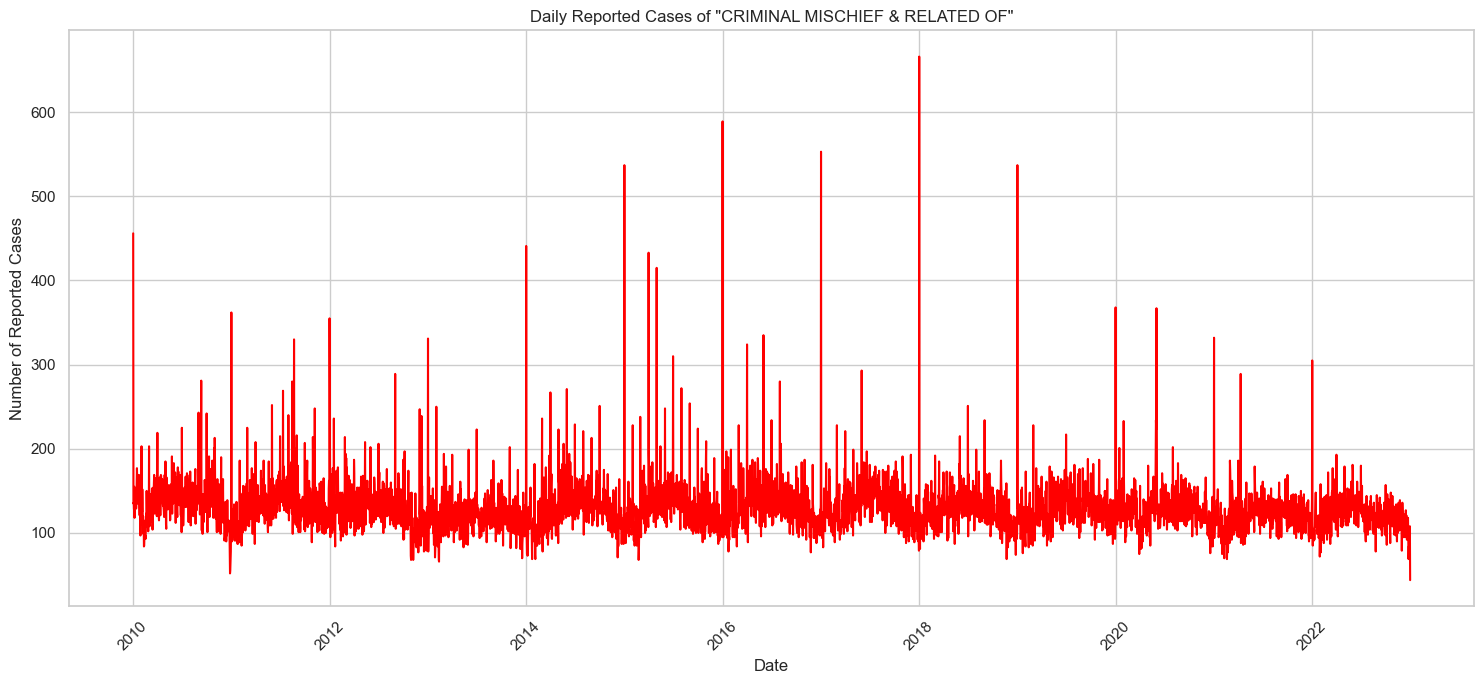

In [29]:
# Filtering the DataFrame for entries related to 'CRIMINAL MISCHIEF & RELATED OF' only
cm_related_df = trends_over_yrs_df[trends_over_yrs_df['ofns_desc'] == "CRIMINAL MISCHIEF & RELATED OF"]

# Ensuring 'ds' column is in datetime format
cm_related_df['ds'] = pd.to_datetime(cm_related_df['ds'])

# Grouping by date to calculate the total number of cases reported each day
daily_cases = cm_related_df.groupby(cm_related_df['ds'].dt.date).size().reset_index(name='daily_counts')

# Renaming the columns for clarity
daily_cases.rename(columns={'ds': 'date'}, inplace=True)

# Plotting the trend of daily reported cases for 'CRIMINAL MISCHIEF & RELATED OF'
plt.figure(figsize=(15, 7))
plt.plot(daily_cases['date'], daily_cases['daily_counts'], linestyle='-', color='red')
plt.title('Daily Reported Cases of "CRIMINAL MISCHIEF & RELATED OF"')
plt.xlabel('Date')
plt.ylabel('Number of Reported Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


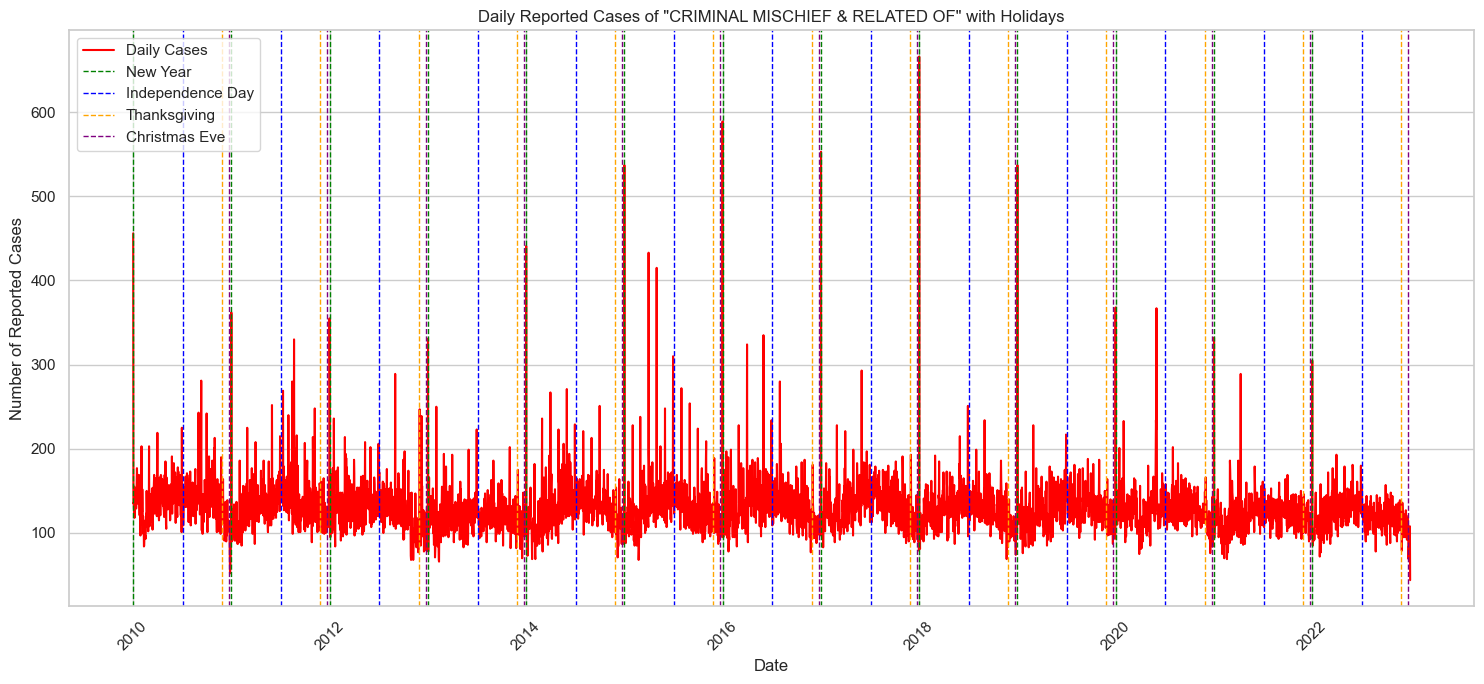

In [44]:
# Define holidays for each year in the range
years = range(2010, 2023)  # End year is exclusive
holidays = {
    "New Year": ["01-01"],
    "Independence Day": ["07-04"],
    "Thanksgiving": ["11-28"],  # Assuming the date is fixed for the example
    "Christmas Eve": ["12-24"],
}

# Create a dictionary to hold the dates for each holiday
holiday_dates = {name: pd.to_datetime([f"{year}-{date}" for year in years]) for name, dates in holidays.items() for date in dates}

# Plotting the daily reported cases
plt.figure(figsize=(15, 7))
plt.plot(daily_cases['date'], daily_cases['daily_counts'], linestyle='-', color='red', label='Daily Cases')

# Plot holidays with different colors
colors = ['green', 'blue', 'orange', 'purple']
for (holiday, dates), color in zip(holiday_dates.items(), colors):
    for date in dates:
        plt.axvline(x=date, color=color, linestyle='--', linewidth=1, label=holiday if date == dates[0] else "")

# Add legend
plt.legend()

# Add title and labels
plt.title('Daily Reported Cases of "CRIMINAL MISCHIEF & RELATED OF" with Holidays')
plt.xlabel('Date')
plt.ylabel('Number of Reported Cases')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

